Credit Risk Modelling - Loan Classification
=

The Loan Classification project aims to predict the likelihood of loan repayment for applicants. By leveraging machine learning techniques, we’ll analyze applicant data, preprocess features, train models, and evaluate their performance

**Import Relevent Libraries/Modules**

**Basic EDA**
  - Missing Data
  - Duplicate Data
  - Outliers and Anonalies
  - Data Visualization
  - Feature Encoding
  - Feature Selection

**Model Building**
  - Seperate your Independent and Dependent
  - Split your Data into Train and Test
  - Model Selection
  - Model Traning with XGboost
  - Model Evalution
  - Model Ecaluation
  - Hyperprameter tunning with XGboost
  - Preform Grid Search

Import Relevent Libraries/Modules
-

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_detection.csv')
df.head()
#to see top five row of data set...

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [3]:
df.shape

(41188, 60)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_services    

In [5]:
df.describe() #discribe function

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.963217,0.087623,0.253035,0.224677,0.035350,0.025736,...,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.188230,0.282749,0.434756,0.417375,0.184665,0.158348,...,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Missing Data
-

In [6]:
df.isna().sum()

age                              0
campaign                         0
pdays                            0
previous                         0
no_previous_contact              0
not_working                      0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university

In [7]:
df.isna().mean()*100
#persentage make eassy to understand

age                              0.0
campaign                         0.0
pdays                            0.0
previous                         0.0
no_previous_contact              0.0
not_working                      0.0
job_admin.                       0.0
job_blue-collar                  0.0
job_entrepreneur                 0.0
job_housemaid                    0.0
job_management                   0.0
job_retired                      0.0
job_self-employed                0.0
job_services                     0.0
job_student                      0.0
job_technician                   0.0
job_unemployed                   0.0
job_unknown                      0.0
marital_divorced                 0.0
marital_married                  0.0
marital_single                   0.0
marital_unknown                  0.0
education_basic.4y               0.0
education_basic.6y               0.0
education_basic.9y               0.0
education_high.school            0.0
education_illiterate             0.0
e

*Hence, There is no missing data*

Duplicate Data
-

In [8]:
df.duplicated().sum()

2417

In [9]:
df[df.duplicated()]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
10,41,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
11,25,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
16,35,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
31,59,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
104,52,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40928,21,1,999,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
41131,58,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
41167,32,3,999,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
41172,31,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [10]:
duplicates = df.duplicated()
# View or remove duplicate rows

print(df[duplicates])
# To view duplicates

df.drop_duplicates(inplace=True)
# To remove duplicates (inplace modifies df directly)

       age  campaign  pdays  previous  no_previous_contact  not_working  \
10      41         1    999         0                    1            0   
11      25         1    999         0                    1            0   
16      35         1    999         0                    1            0   
31      59         1    999         0                    1            0   
104     52         1    999         0                    1            0   
...    ...       ...    ...       ...                  ...          ...   
40928   21         1    999         0                    1            1   
41131   58         1    999         0                    1            0   
41167   32         3    999         0                    1            0   
41172   31         1    999         0                    1            0   
41181   37         1    999         0                    1            0   

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  ...  \
10              0      

In [11]:
df.duplicated().sum()

0

*Now there is zero duplicates*

Outlier Detection and treatment
-

<Axes: >

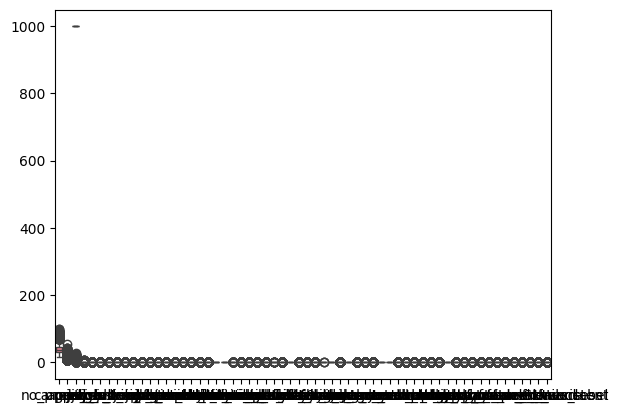

In [12]:
sns.boxplot(df)
#for individuality

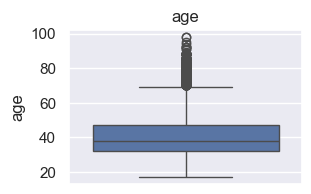

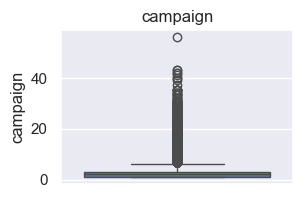

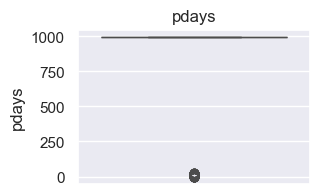

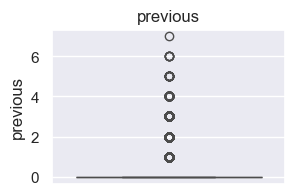

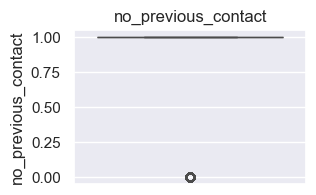

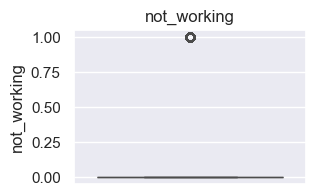

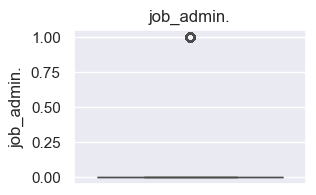

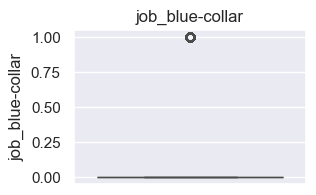

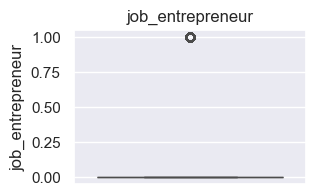

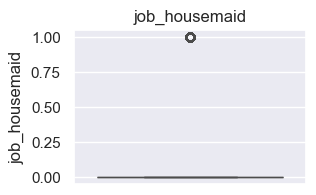

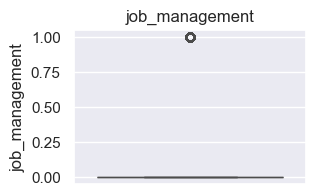

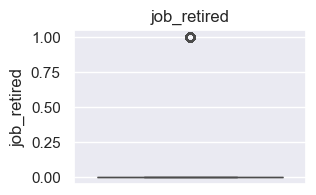

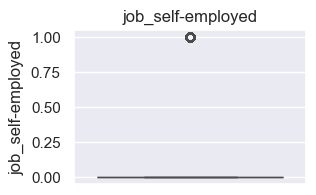

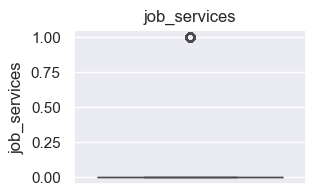

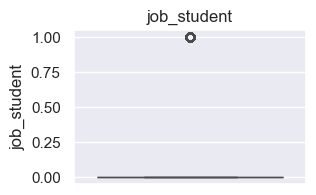

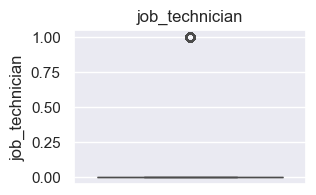

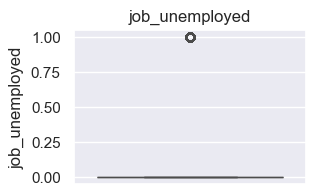

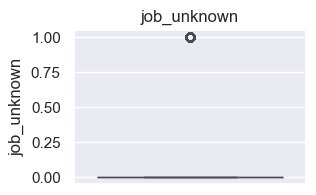

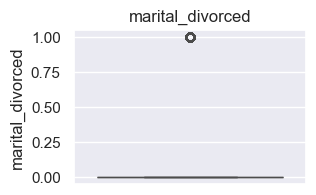

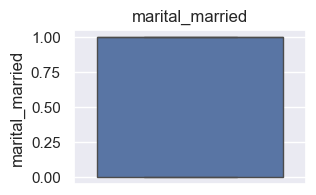

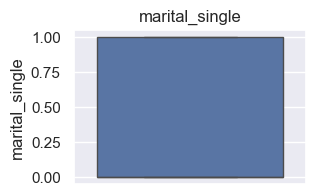

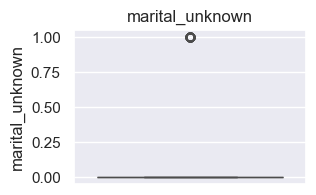

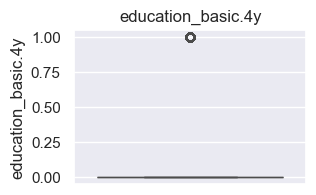

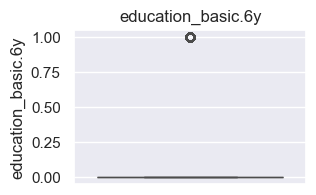

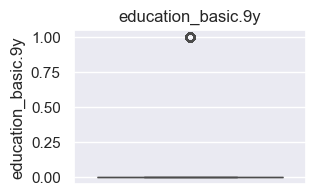

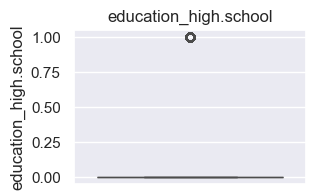

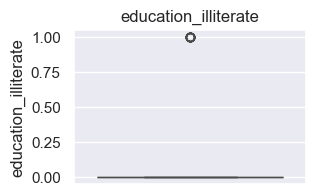

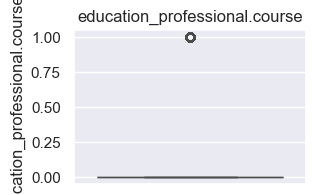

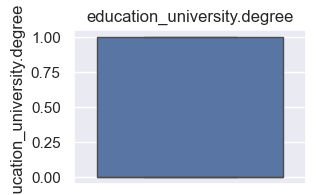

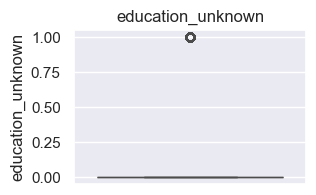

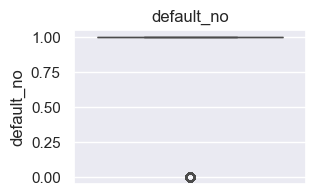

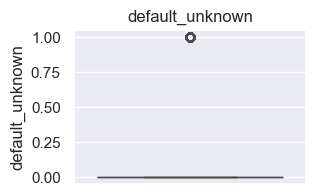

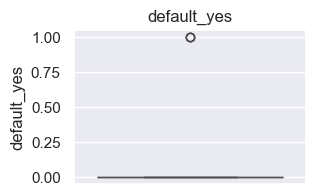

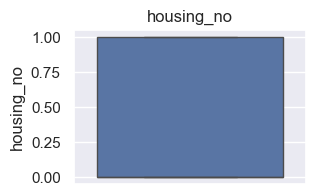

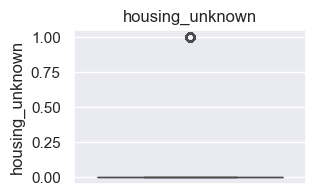

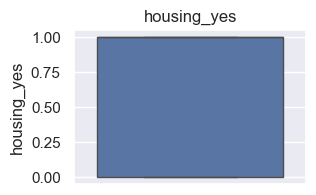

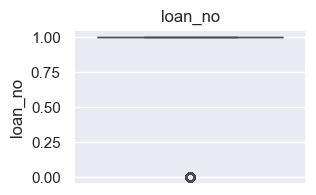

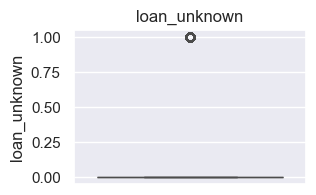

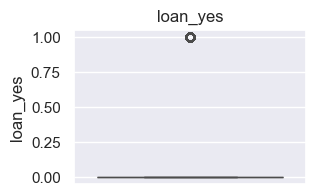

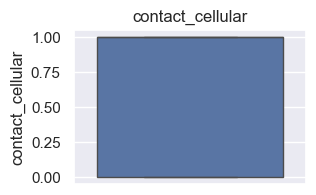

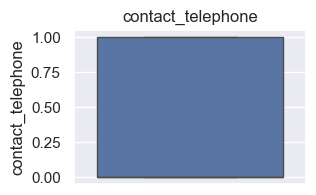

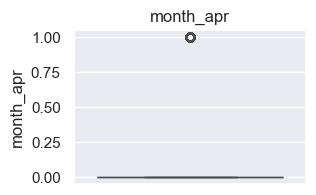

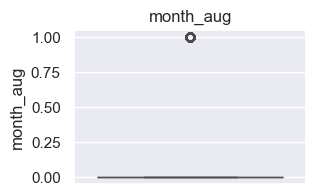

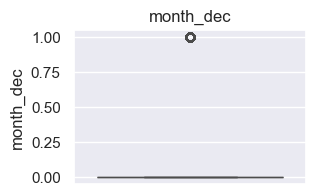

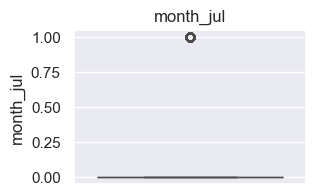

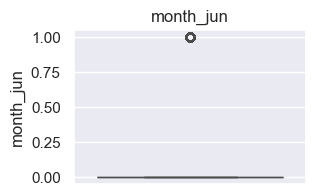

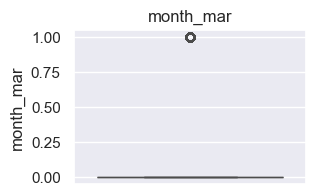

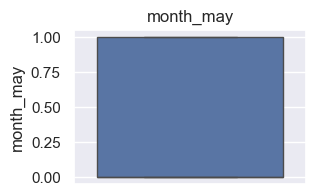

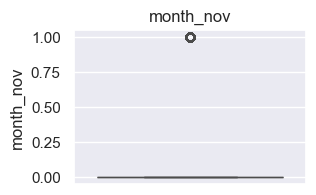

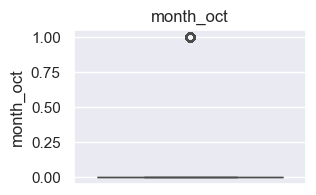

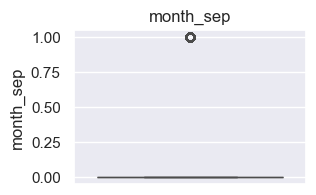

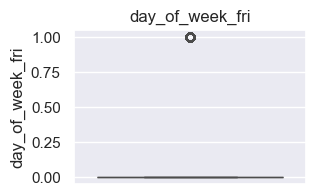

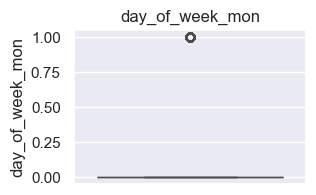

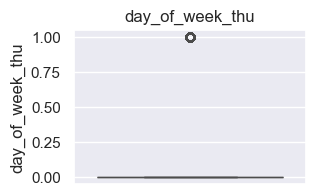

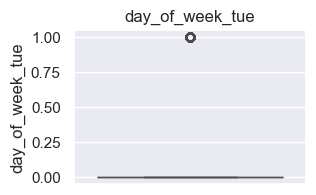

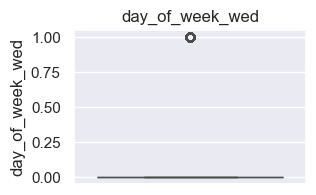

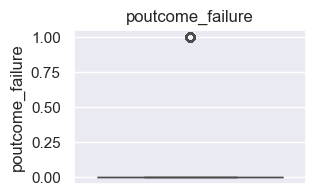

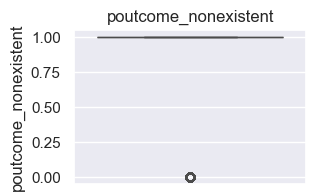

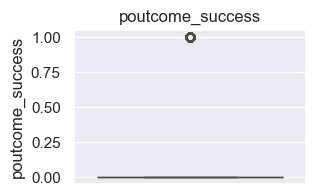

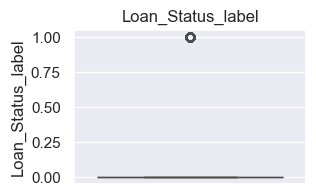

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
sns.set(rc={"figure.figsize": (3, 2)})  # Adjusting the size as needed

# Iterate through columns and create boxplots
for col in df.columns:
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()


IQR
-

In [14]:
Q1 = df.quantile(0.25) #25%of data
Q3 = df.quantile(0.75) #75% of data

IQR = Q3 - Q1
IQR

age                              15.0
campaign                          2.0
pdays                             0.0
previous                          0.0
no_previous_contact               0.0
not_working                       0.0
job_admin.                        0.0
job_blue-collar                   0.0
job_entrepreneur                  0.0
job_housemaid                     0.0
job_management                    0.0
job_retired                       0.0
job_self-employed                 0.0
job_services                      0.0
job_student                       0.0
job_technician                    0.0
job_unemployed                    0.0
job_unknown                       0.0
marital_divorced                  0.0
marital_married                   1.0
marital_single                    1.0
marital_unknown                   0.0
education_basic.4y                0.0
education_basic.6y                0.0
education_basic.9y                0.0
education_high.school             0.0
education_il

In [15]:
print(Q1- 1.5*IQR)
print()
print(Q3 + 1.5*IQR)

age                                9.5
campaign                          -2.0
pdays                            999.0
previous                           0.0
no_previous_contact                1.0
not_working                        0.0
job_admin.                         0.0
job_blue-collar                    0.0
job_entrepreneur                   0.0
job_housemaid                      0.0
job_management                     0.0
job_retired                        0.0
job_self-employed                  0.0
job_services                       0.0
job_student                        0.0
job_technician                     0.0
job_unemployed                     0.0
job_unknown                        0.0
marital_divorced                   0.0
marital_married                   -1.5
marital_single                    -1.5
marital_unknown                    0.0
education_basic.4y                 0.0
education_basic.6y                 0.0
education_basic.9y                 0.0
education_high.school    

In [16]:
df.shape

(38771, 60)

In [17]:
# if the df value is smaller than lower quadirnt(IQL) OR the Df is gratter than upper quadient data
df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label



Feature Selection
-

In [18]:
df

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [19]:
df.corr()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
age,1.000000,-0.000792,-0.032680,0.020430,-0.032600,0.207835,-0.095507,-0.030068,0.027431,0.084198,...,0.040026,0.006287,0.017340,-0.019094,0.017902,-0.022350,-0.007085,-0.011749,0.034118,0.026865
campaign,-0.000792,1.000000,0.057855,-0.086774,0.057840,-0.021846,0.015630,0.000038,-0.004086,0.002921,...,-0.036927,0.025805,0.010532,0.007932,-0.024070,-0.020438,-0.075279,0.096142,-0.055900,-0.074539
pdays,-0.032680,0.057855,1.000000,-0.588940,0.999992,-0.112069,-0.028564,0.066963,0.020523,-0.000918,...,-0.154564,0.014940,0.002517,-0.009324,-0.008213,0.000339,0.009098,0.493971,-0.950559,-0.324611
previous,0.020430,-0.086774,-0.588940,1.000000,-0.588887,0.103602,0.023149,-0.056865,-0.015668,-0.012511,...,0.157224,0.003027,-0.004078,0.002367,0.001799,-0.003039,0.678092,-0.877385,0.525045,0.228665
no_previous_contact,-0.032600,0.057840,0.999992,-0.588887,1.000000,-0.112069,-0.028578,0.066956,0.020524,-0.000907,...,-0.154550,0.014932,0.002493,-0.009325,-0.008194,0.000353,0.008844,0.493975,-0.950141,-0.324572
not_working,0.207835,-0.021846,-0.112069,0.103602,-0.112069,1.000000,-0.181604,-0.169473,-0.061192,-0.051962,...,0.084659,0.001643,-0.006026,-0.001012,0.007139,-0.001549,0.031470,-0.082430,0.103344,0.118294
job_admin.,-0.095507,0.015630,-0.028564,0.023149,-0.028578,-0.181604,1.000000,-0.308601,-0.111427,-0.094620,...,0.011884,0.007820,-0.000429,-0.003825,-0.000034,-0.003369,0.005870,-0.020046,0.028119,0.035250
job_blue-collar,-0.030068,0.000038,0.066963,-0.056865,0.066956,-0.169473,-0.308601,1.000000,-0.103984,-0.088300,...,-0.055378,0.002939,-0.009880,-0.007824,-0.004312,0.019503,-0.014362,0.045937,-0.062914,-0.075625
job_entrepreneur,0.027431,-0.004086,0.020523,-0.015668,0.020524,-0.061192,-0.111427,-0.103984,1.000000,-0.031882,...,-0.009700,-0.000656,0.005297,0.004588,-0.005552,-0.003921,-0.000734,0.010381,-0.018425,-0.019306
job_housemaid,0.084198,0.002921,-0.000918,-0.012511,-0.000907,-0.051962,-0.094620,-0.088300,-0.031882,1.000000,...,-0.003855,-0.007712,0.002484,-0.009665,0.013182,0.001816,-0.018584,0.015602,0.001598,-0.007496


<Axes: >

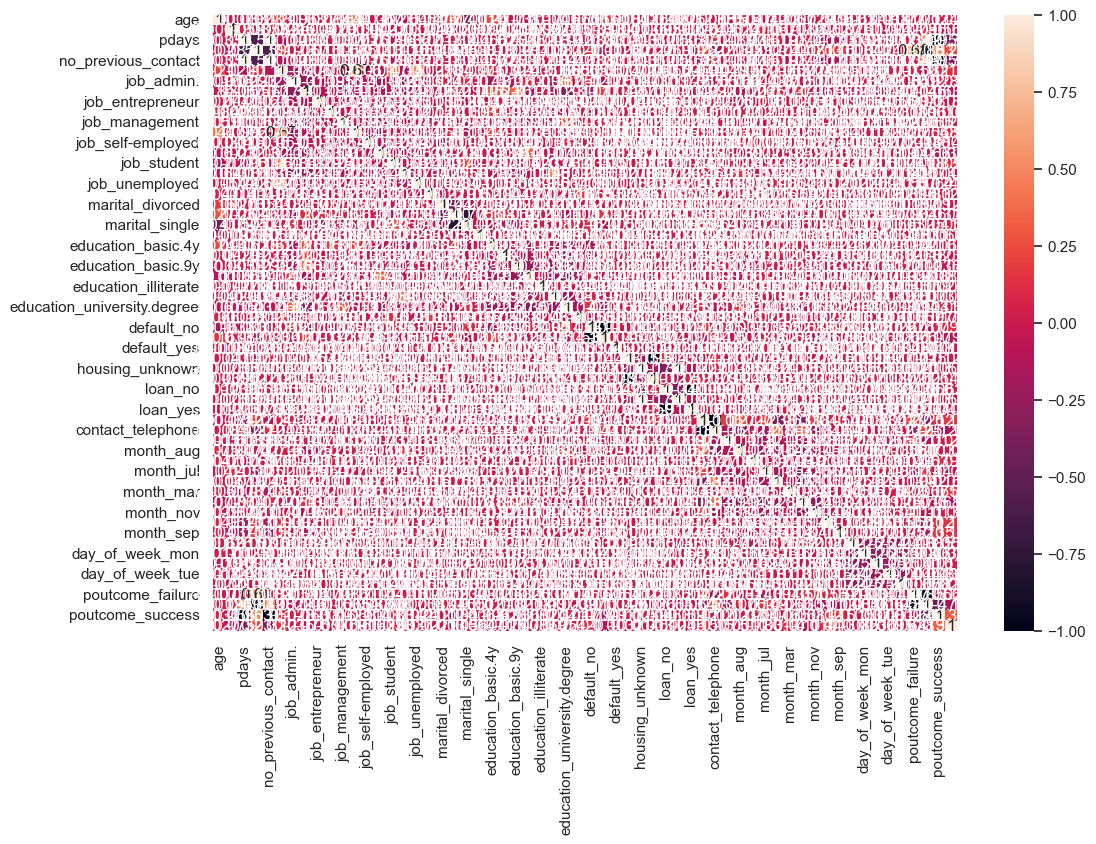

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

Model Bulding
-

In [21]:
df.head()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [22]:
x = df.iloc[:, :-1]
x

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [23]:
y = df['Loan_Status_label']
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: Loan_Status_label, Length: 38771, dtype: int64

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [25]:
x_train

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
34767,38,9,999,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
32132,36,1,999,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9868,49,1,999,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
20192,36,9,999,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
28805,50,2,999,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6625,35,2,999,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
11843,31,3,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
40568,70,4,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
885,43,1,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [26]:
x_test

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
37815,57,1,999,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5279,53,2,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
40810,30,1,999,3,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3788,29,2,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
20910,30,1,999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6833,35,2,999,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
18429,45,1,999,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
18590,28,2,999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4545,33,10,999,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [27]:
y_train

34767    0
32132    0
9868     0
20192    0
28805    1
        ..
6625     0
11843    0
40568    0
885      0
16784    0
Name: Loan_Status_label, Length: 31016, dtype: int64

In [28]:
y_test

37815    0
5279     0
40810    0
3788     0
20910    0
        ..
6833     0
18429    0
18590    0
4545     0
26987    0
Name: Loan_Status_label, Length: 7755, dtype: int64

Feature Scaling
-

In [29]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [30]:
x_test_sc

array([[ 1.59723243, -0.58081638,  0.20500869, ...,  2.88584828,
        -2.43949646, -0.19507302],
       [ 1.21633241, -0.2237593 ,  0.20500869, ..., -0.34651856,
         0.40992066, -0.19507302],
       [-0.97384269, -0.58081638,  0.20500869, ...,  2.88584828,
        -2.43949646, -0.19507302],
       ...,
       [-1.1642927 , -0.2237593 ,  0.20500869, ..., -0.34651856,
         0.40992066, -0.19507302],
       [-0.68816768,  2.63269734,  0.20500869, ..., -0.34651856,
         0.40992066, -0.19507302],
       [-0.68816768,  0.13329778,  0.20500869, ..., -0.34651856,
         0.40992066, -0.19507302]])

In [31]:
x_train_sc

array([[-0.21204265,  2.27564026,  0.20500869, ..., -0.34651856,
         0.40992066, -0.19507302],
       [-0.40249266, -0.58081638,  0.20500869, ...,  2.88584828,
        -2.43949646, -0.19507302],
       [ 0.8354324 , -0.58081638,  0.20500869, ..., -0.34651856,
         0.40992066, -0.19507302],
       ...,
       [ 2.83515749,  0.49035486,  0.20500869, ..., -0.34651856,
         0.40992066, -0.19507302],
       [ 0.26408237, -0.58081638,  0.20500869, ..., -0.34651856,
         0.40992066, -0.19507302],
       [ 0.26408237, -0.2237593 ,  0.20500869, ..., -0.34651856,
         0.40992066, -0.19507302]])

In [32]:
len(x_train_sc), len(x_test_sc)

(31016, 7755)

Model Selection
-

In [33]:
#on normal dateset
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [34]:
print(f'Traning Accuracy : {lr.score(x_train_sc, y_train)}')
print(f'Test Accuracy : {lr.score(x_test_sc, y_test)}')

Traning Accuracy : 0.6308356977044106
Test Accuracy : 0.6362346872985171


Using Decision Tree
-

In [35]:
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [36]:
print(f'Traning Accuracy: {dt.score(x_train, y_train)}')
print(f'Test Accuracy : {dt.score(x_test, y_test)}')

Traning Accuracy: 0.8924103688418881
Test Accuracy : 0.9003223726627982


DT model classified correctly.
* A score of 0.89 suggests that the model correctly classified roughly 89% of the training samples 
* Here, the model achieved an accuracy of around 90% on the testing data

In [37]:
#with sacled data set
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train_sc, y_train)

DecisionTreeClassifier(max_depth=5)

In [38]:
print(f'Training Accuracy : {dt.score(x_train_sc, y_train)}')
print(f'Test Accuracy : {dt.score(x_test_sc, y_test)}')

Training Accuracy : 0.893345370131545
Test Accuracy : 0.8992907801418439


A test accuracy close to 90% suggests the model is making accurate predictions on unseen data

Model Traning with xgboost
-

**Using Xgboost**

In [39]:
xgb = XGBClassifier(gamma=0.5, reg_alpha=0.6, reg_lamba=0.3)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
print(f'Teain Accuracy : {xgb.score(x_train, y_train)}')
print(f'Test Accuracy : {xgb.score(x_test, y_test)}')

Teain Accuracy : 0.9031145215372711
Test Accuracy : 0.8952933591231463


In [41]:
y_pred_xgtr = xgb.predict(x_train)
y_pred_xgts = xgb.predict(x_test)

In [42]:
x_train[:3]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
34767,38,9,999,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
32132,36,1,999,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9868,49,1,999,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [43]:
y_train[:3]

34767    0
32132    0
9868     0
Name: Loan_Status_label, dtype: int64

In [44]:
y_pred_xgtr[:3]

array([0, 0, 0])

Model Ecaluation
-

In [45]:
confusion_matrix(y_train, y_pred_xgtr)

array([[26956,   329],
       [ 2676,  1055]], dtype=int64)

<Axes: >

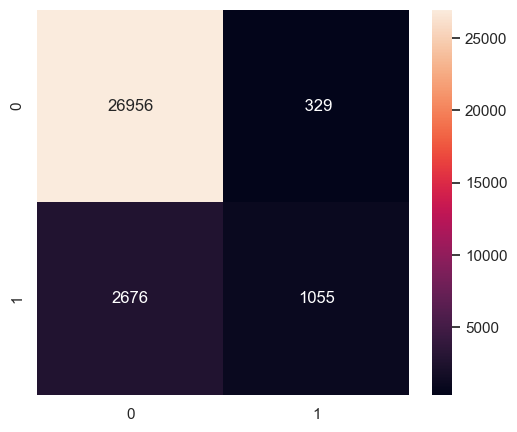

In [61]:
# Set the figure size
sns.set(rc={"figure.figsize": (6, 5)})
sns.heatmap(confusion_matrix(y_train, y_pred_xgtr), annot= True, fmt='4g')

In [47]:
accuracy_score(y_train, y_pred_xgtr)

0.9031145215372711

In [48]:
print(classification_report(y_train, y_pred_xgtr))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     27285
           1       0.76      0.28      0.41      3731

    accuracy                           0.90     31016
   macro avg       0.84      0.64      0.68     31016
weighted avg       0.89      0.90      0.88     31016



**Precision**: Proportion of predicted positive cases (class 1) that were actually correct TP(true positives), for class 1(likely representing bad loans), a precision of 0.76 means,out of all the loan applications predicted as the bad loans, 76% actually turned out to be bad loans.

**Recall**: Proportion of actual positive cases (class 1) that were correctly identified by the model (true positives). Here, a recall of 0.28 for class 1 suggests that the model identified only 28% of the actual bad loan applications.

**F1-Score**: This is a harmonic mean between precision and recall, providing a balanced view of both metrics. A score of 0.41 for class 1 indicates a trade-off between precision and recall for identifying bad loans.

**Support**: This value represents the total number of true instances for each class in the dataset. Here, there are 27285 good loans (class 0) and 3731 bad loans (class 1) in the training data.

**Accuracy** : the model correctly classified 90% of the loan applications in the training set.

Test
-

<Axes: >

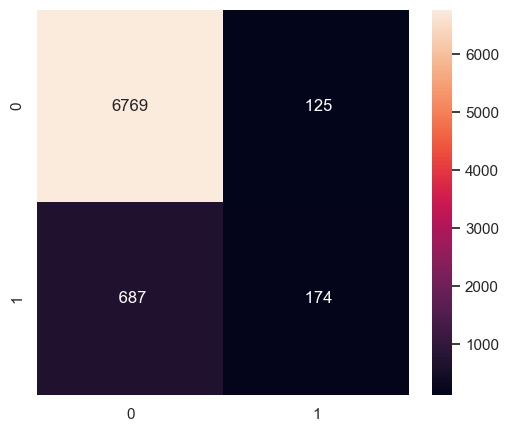

In [62]:
sns.heatmap(confusion_matrix(y_test, y_pred_xgts), annot= True, fmt='4g')

In [50]:
accuracy_score(y_test, y_pred_xgts)

0.8952933591231463

Hyperparameter Tunning with xgboost
-

In [51]:
#Param Grid

parameters ={
    'n_estimators'  : [100, 200],#Number of decision trees to be used in the XGBoost ensemble.
    'learning_rate' : [0.1, 0.01, 0.05],#Controls the step size used when updating the model weights during training.
    'max_depth'     : [3, 4, 5],#Maximum depth of each individual decision tree in the ensemble.
    'gamma'         : [0.2, 0.3],#Minimum loss reduction required for a node to be further split.
    'reg_alpha'     : [0.1, 1],#L1 regularization term on weights. Higher values encourage sparsity 
    'reg_lambda'    : [0.1, 1], # L2 regularization term on weights.

}

parameters

{'n_estimators': [100, 200],
 'learning_rate': [0.1, 0.01, 0.05],
 'max_depth': [3, 4, 5],
 'gamma': [0.2, 0.3],
 'reg_alpha': [0.1, 1],
 'reg_lambda': [0.1, 1]}

Perform Grid Search
-

In [52]:
gird_search = GridSearchCV(estimator=xgb, param_grid=parameters, scoring='accuracy', cv=5, verbose=3)
gird_search.fit(x_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.895 total time=   0.7s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.895 total time=   0.4s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.892 total time=   0.4s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.891 total time=   0.3s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.887 total time=   0.4s
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.894 total time=   0.3s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.896 t

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.5,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.2, 0.3],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200],
                         'reg_alpha': [0.1, 1], 'reg_lambda': [0.1, 1]},
             scoring='accuracy', verbose=3)

In [53]:
print(f'Best Selected Hyperparameters: \n\{gird_search.best_params_}\n')
print(f'Best Estimator: \n\n{gird_search.best_estimator_}')

Best Selected Hyperparameters: 
\{'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 0.1}

Best Estimator: 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [54]:
y_pr_tr = xgb.predict(x_train_sc)
y_pr_tst = xgb.predict(x_test_sc)

<Axes: >

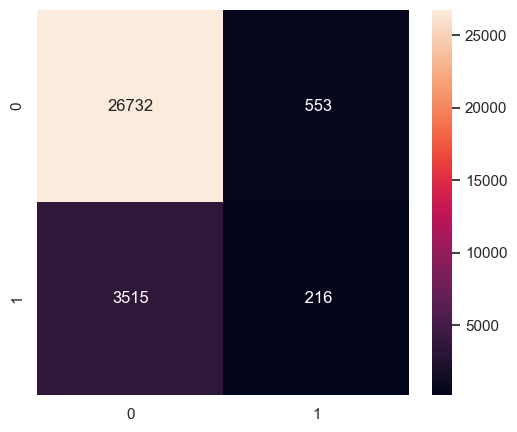

In [64]:
sns.heatmap(confusion_matrix(y_train, y_pr_tr), annot=True, fmt='4g')

In [56]:
accuracy_score(y_train, y_pr_tr)

0.8688418880577766

In [57]:
print(classification_report(y_train, y_pr_tr))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     27285
           1       0.28      0.06      0.10      3731

    accuracy                           0.87     31016
   macro avg       0.58      0.52      0.51     31016
weighted avg       0.81      0.87      0.83     31016



<Axes: >

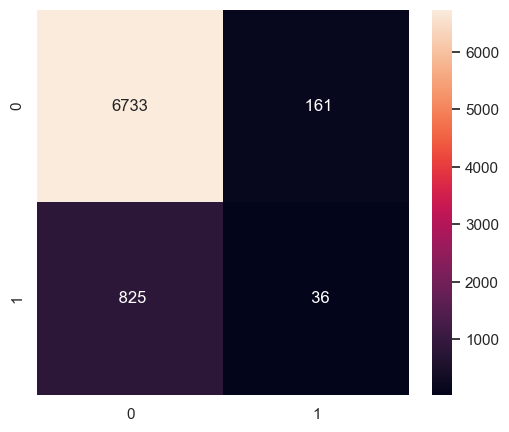

In [63]:
sns.heatmap(confusion_matrix(y_test, y_pr_tst), annot=True, fmt='4g')

In [59]:
accuracy_score(y_test, y_pr_tst)

0.872856221792392

In [60]:
print(classification_report(y_test, y_pr_tst))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6894
           1       0.18      0.04      0.07       861

    accuracy                           0.87      7755
   macro avg       0.54      0.51      0.50      7755
weighted avg       0.81      0.87      0.84      7755




**Precision** : Precision measures how many of the predicted positive instances (class 1) are actually true positives.
Precision for class 0 (negative class) is 0.89, meaning 89% of the predicted negatives are true negatives.
Precision for class 1 (positive class) is 0.18, indicating that only 18% of the predicted positives are true positives.

**Recall**:
Recall measures how many of the actual positive instances were correctly predicted by the model.
Recall for class 0 is 0.98, meaning 98% of the actual negatives were correctly predicted.
Recall for class 1 is 0.04, indicating that only 4% of the actual positives were correctly predicted.

**F1-Score**:
The F1-score is the harmonic mean of precision and recall. It balances both metrics.
The F1-score for class 0 is 0.93.
The F1-score for class 1 is 0.07.

**Support**:
Support represents the number of instances in each class (actual occurrences).
Class 0 has 6894 instances.
Class 1 has 861 instances.

**Accuracy**: (87%)
Overall accuracy of the model (correct predictions divided by total predictions).